In [97]:
import os

import h5py as h5
import matplotlib as mpt
import matplotlib.pyplot as plt
import numpy as np

import astropy.units as u

import sys
sys.path.append("helpers")

import FIREMapper
import readsnap
import readmap
from meo_python_lib import get_stellar_ages, quick_lookback_time

In [47]:
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.9 * fs,
          'ytick.labelsize': 0.9 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)

In [48]:
for i in range(592, 600):
    FIREMapper.TheMap("m11h_res7100", i)

npart_file:  [15055659 15799600  4341648        0   743941        0]
npart_total: [15055659 15799600  4341648        0   743941        0]
Gridsize = 30.00 kpc, Nx = 30
npart_file:  [15055538 15799600  4341648        0   744062        0]
npart_total: [15055538 15799600  4341648        0   744062        0]
Gridsize = 30.00 kpc, Nx = 30
npart_file:  [15055450 15799600  4341648        0   744150        0]
npart_total: [15055450 15799600  4341648        0   744150        0]
Gridsize = 30.00 kpc, Nx = 30
npart_file:  [15055373 15799600  4341648        0   744227        0]
npart_total: [15055373 15799600  4341648        0   744227        0]
Gridsize = 30.00 kpc, Nx = 30
npart_file:  [15055268 15799600  4341648        0   744332        0]
npart_total: [15055268 15799600  4341648        0   744332        0]
Gridsize = 30.00 kpc, Nx = 30
npart_file:  [15055198 15799600  4341648        0   744402        0]
npart_total: [15055198 15799600  4341648        0   744402        0]
Gridsize = 30.00 kpc, 

# Projections

In [49]:
with h5.File(f"/mnt/home/twagg/ceph/FIREmaps/m11h_res7100/centers/snap_{600}_cents.hdf5") as cent:
    print(cent.attrs.keys())

<KeysViewHDF5 ['Center', 'NormalVector', 'Phi', 'Redshift', 'Rhalfstar', 'RunName', 'SnapNum', 'StellarCMVel', 'StellarCenter', 'Theta', 'Time']>


In [205]:
from tomFIRE import FIRESnapshot

In [206]:
stars = FIRESnapshot()

npart_file:  [15054933 15799600  4341648        0   744667        0]
npart_total: [15054933 15799600  4341648        0   744667        0]
npart_file:  [15054933 15799600  4341648        0   744667        0]
npart_total: [15054933 15799600  4341648        0   744667        0]


In [50]:
snap = readsnap.readsnap(sdir="/mnt/home/chayward/firesims/fire2/public_release/core/m11h_res7100/output", snum=600, ptype=4, cosmological=1)
header = readsnap.readsnap(sdir="/mnt/home/chayward/firesims/fire2/public_release/core/m11h_res7100/output", snum=600, ptype=4, header_only=1, cosmological=1)

npart_file:  [15054933 15799600  4341648        0   744667        0]
npart_total: [15054933 15799600  4341648        0   744667        0]


npart_file:  [15054933 15799600  4341648        0   744667        0]
npart_total: [15054933 15799600  4341648        0   744667        0]


In [51]:
get_stellar_ages(snap, header)

array([9.71430776e+00, 8.43356304e-04, 7.79302551e-04, ...,
       1.17715528e+01, 1.20701431e+01, 1.24383135e+01])

In [52]:
(quick_lookback_time(1 / snap["age"] - 1) < 15).sum()

744667

In [53]:
snap["age"]

array([0.37457848, 0.99993879, 0.99994344, ..., 0.22723532, 0.20261478,
       0.17015715])

In [54]:
header

{'k': 0,
 'time': 0.999999999715342,
 'boxsize': 85999.9999755194,
 'hubble': 0.68,
 'npart': array([15054933, 15799600,  4341648,        0,   744667,        0],
       dtype=int32),
 'npartTotal': array([15054933, 15799600,  4341648,        0,   744667,        0],
       dtype=uint32),
 'Omega0': 0.31}

In [132]:
class Snapshot():
    def __init__(self, snap_num=600,
                 snap_dir="/mnt/home/chayward/firesims/fire2/public_release/core/m11h_res7100/output",
                 which_centre="main", max_r=30 * u.kpc, min_t_form=13.6 * u.Gyr, particle_type="stars"):
        if isinstance(particle_type, str):
            ptype_convertor = {
                "gas": 0,
                "dark_matter": 1,
                "dark_matter_low_res": 2,
                "stars": 4
            }
            particle_type = ptype_convertor[particle_type]
        self.particle_type = particle_type

        # grab the snapshot data
        snap = readsnap.readsnap(sdir=snap_dir, snum=snap_num, ptype=particle_type, cosmological=1)
        header = readsnap.readsnap(sdir=snap_dir, snum=snap_num, ptype=particle_type, header_only=1, cosmological=1)

        # get info about the centre of the galaxy
        with h5.File(f"/mnt/home/twagg/ceph/FIREmaps/m11h_res7100/centers/snap_{snap_num}_cents.hdf5") as cent:
            self.n = cent.attrs["NormalVector"]
            self.centre = cent.attrs["Center"]
            self.stellar_centre = cent.attrs["Center"]
            self.v_cm = cent.attrs["StellarCMVel"]

        self.h = header["hubble"]
        self.Omega_M = header["Omega0"]
        self.max_r = max_r
        self.min_t_form = min_t_form

        # get the positions, velocities and ages
        self.p_all = (snap["p"] - (self.centre if which_centre == "main" else self.stellar_centre)) * u.kpc / self.h
        self.v_all = (snap["v"] - self.v_cm) * u.km / u.s
        self.m_all = snap["m"] * 1e10 * u.Msun / self.h
        self.t_form_all = quick_lookback_time(1 / snap["age"] - 1, h=self.h, Omega_M=self.Omega_M) * u.Gyr\
            if particle_type == 4 else None
        
        self._p = None
        self._v = None
        self._m = None
        self._t_form = None

        self._X_s = None
        self._V_s = None

    def apply_mask(self, max_r=30 * u.kpc, min_t_form=13.6 * u.Gyr):
        # mask based on max distance to galaxy centre
        r_mask = np.linalg.norm(self.p_all, axis=1) < max_r

        if self.particle_type == 4:
            # mask based on stellar age
            age_mask = self.t_form_all > min_t_form
            total_mask = r_mask & age_mask
        else:
            total_mask = r_mask
        self._p = self.p_all[total_mask]
        self._v = self.v_all[total_mask]
        self._m = self.m_all[total_mask]
        self._X_s = None
        self._V_s = None

        if self.particle_type == 4:
            self._t_form = self.t_form_all[total_mask]

    @property
    def p(self):
        if self._p is None:
            self.apply_mask(max_r=self.max_r, min_t_form=self.min_t_form)
        return self._p

    @property
    def v(self):
        if self._v is None:
            self.apply_mask(max_r=self.max_r, min_t_form=self.min_t_form)
        return self._v

    @property
    def m(self):
        if self._m is None:
            self.apply_mask(max_r=self.max_r, min_t_form=self.min_t_form)
        return self._m

    @property
    def t_form(self):
        if self._t_form is None:
            self.apply_mask(max_r=self.max_r, min_t_form=self.min_t_form)
        return self._t_form

    @property
    def X_s(self):
        if self._X_s is None:
            self._X_s = np.matmul(self.p.to(u.kpc).value, self.n.T).T * u.kpc
        return self._X_s

    @property
    def V_s(self):
        if self._V_s is None:
            self._V_s = np.matmul(self.v.to(u.km / u.s).value, self.n.T).T * u.km * u.s
        return self._V_s

    @property
    def x(self):
        return self.X_s[0]

    @property
    def y(self):
        return self.X_s[1]

    @property
    def z(self):
        return self.X_s[2]
    
    @property
    def r(self):
        return np.linalg.norm(self.X_s, axis=0)

    @property
    def v_x(self):
        return self.V_s[0]

    @property
    def v_y(self):
        return self.V_s[1]

    @property
    def v_z(self):
        return self.V_s[2]

In [147]:
gas = Snapshot(particle_type="gas", min_t_form=-1 * u.Gyr)

npart_file:  [15054933 15799600  4341648        0   744667        0]
npart_total: [15054933 15799600  4341648        0   744667        0]
npart_file:  [15054933 15799600  4341648        0   744667        0]
npart_total: [15054933 15799600  4341648        0   744667        0]


In [148]:
dark_matter = Snapshot(particle_type="dark_matter", min_t_form=-1 * u.Gyr)

npart_file:  [15054933 15799600  4341648        0   744667        0]
npart_total: [15054933 15799600  4341648        0   744667        0]
npart_file:  [15054933 15799600  4341648        0   744667        0]
npart_total: [15054933 15799600  4341648        0   744667        0]


In [149]:
stars = Snapshot(min_t_form=-1 * u.Gyr)

npart_file:  [15054933 15799600  4341648        0   744667        0]
npart_total: [15054933 15799600  4341648        0   744667        0]
npart_file:  [15054933 15799600  4341648        0   744667        0]
npart_total: [15054933 15799600  4341648        0   744667        0]


In [188]:
r_range = np.geomspace(2e-1, 30, 100) * u.kpc

res = 7100

m_enc = {}
n_enc = {}

m_enc['total'] = np.zeros(len(r_range)) * u.Msun
n_enc['total'] = np.zeros(len(r_range))

for particles, label in zip([gas, dark_matter, stars], ["Gas", "Dark Matter", "Stars"]):
    m_enc[label] = [particles.m[particles.r < r].sum().value for r in r_range] * u.Msun
    n_enc[label] = np.array([(particles.r < r).sum() for r in r_range])
    m_enc["total"] += m_enc[label]
    n_enc['total'] += n_enc[label]

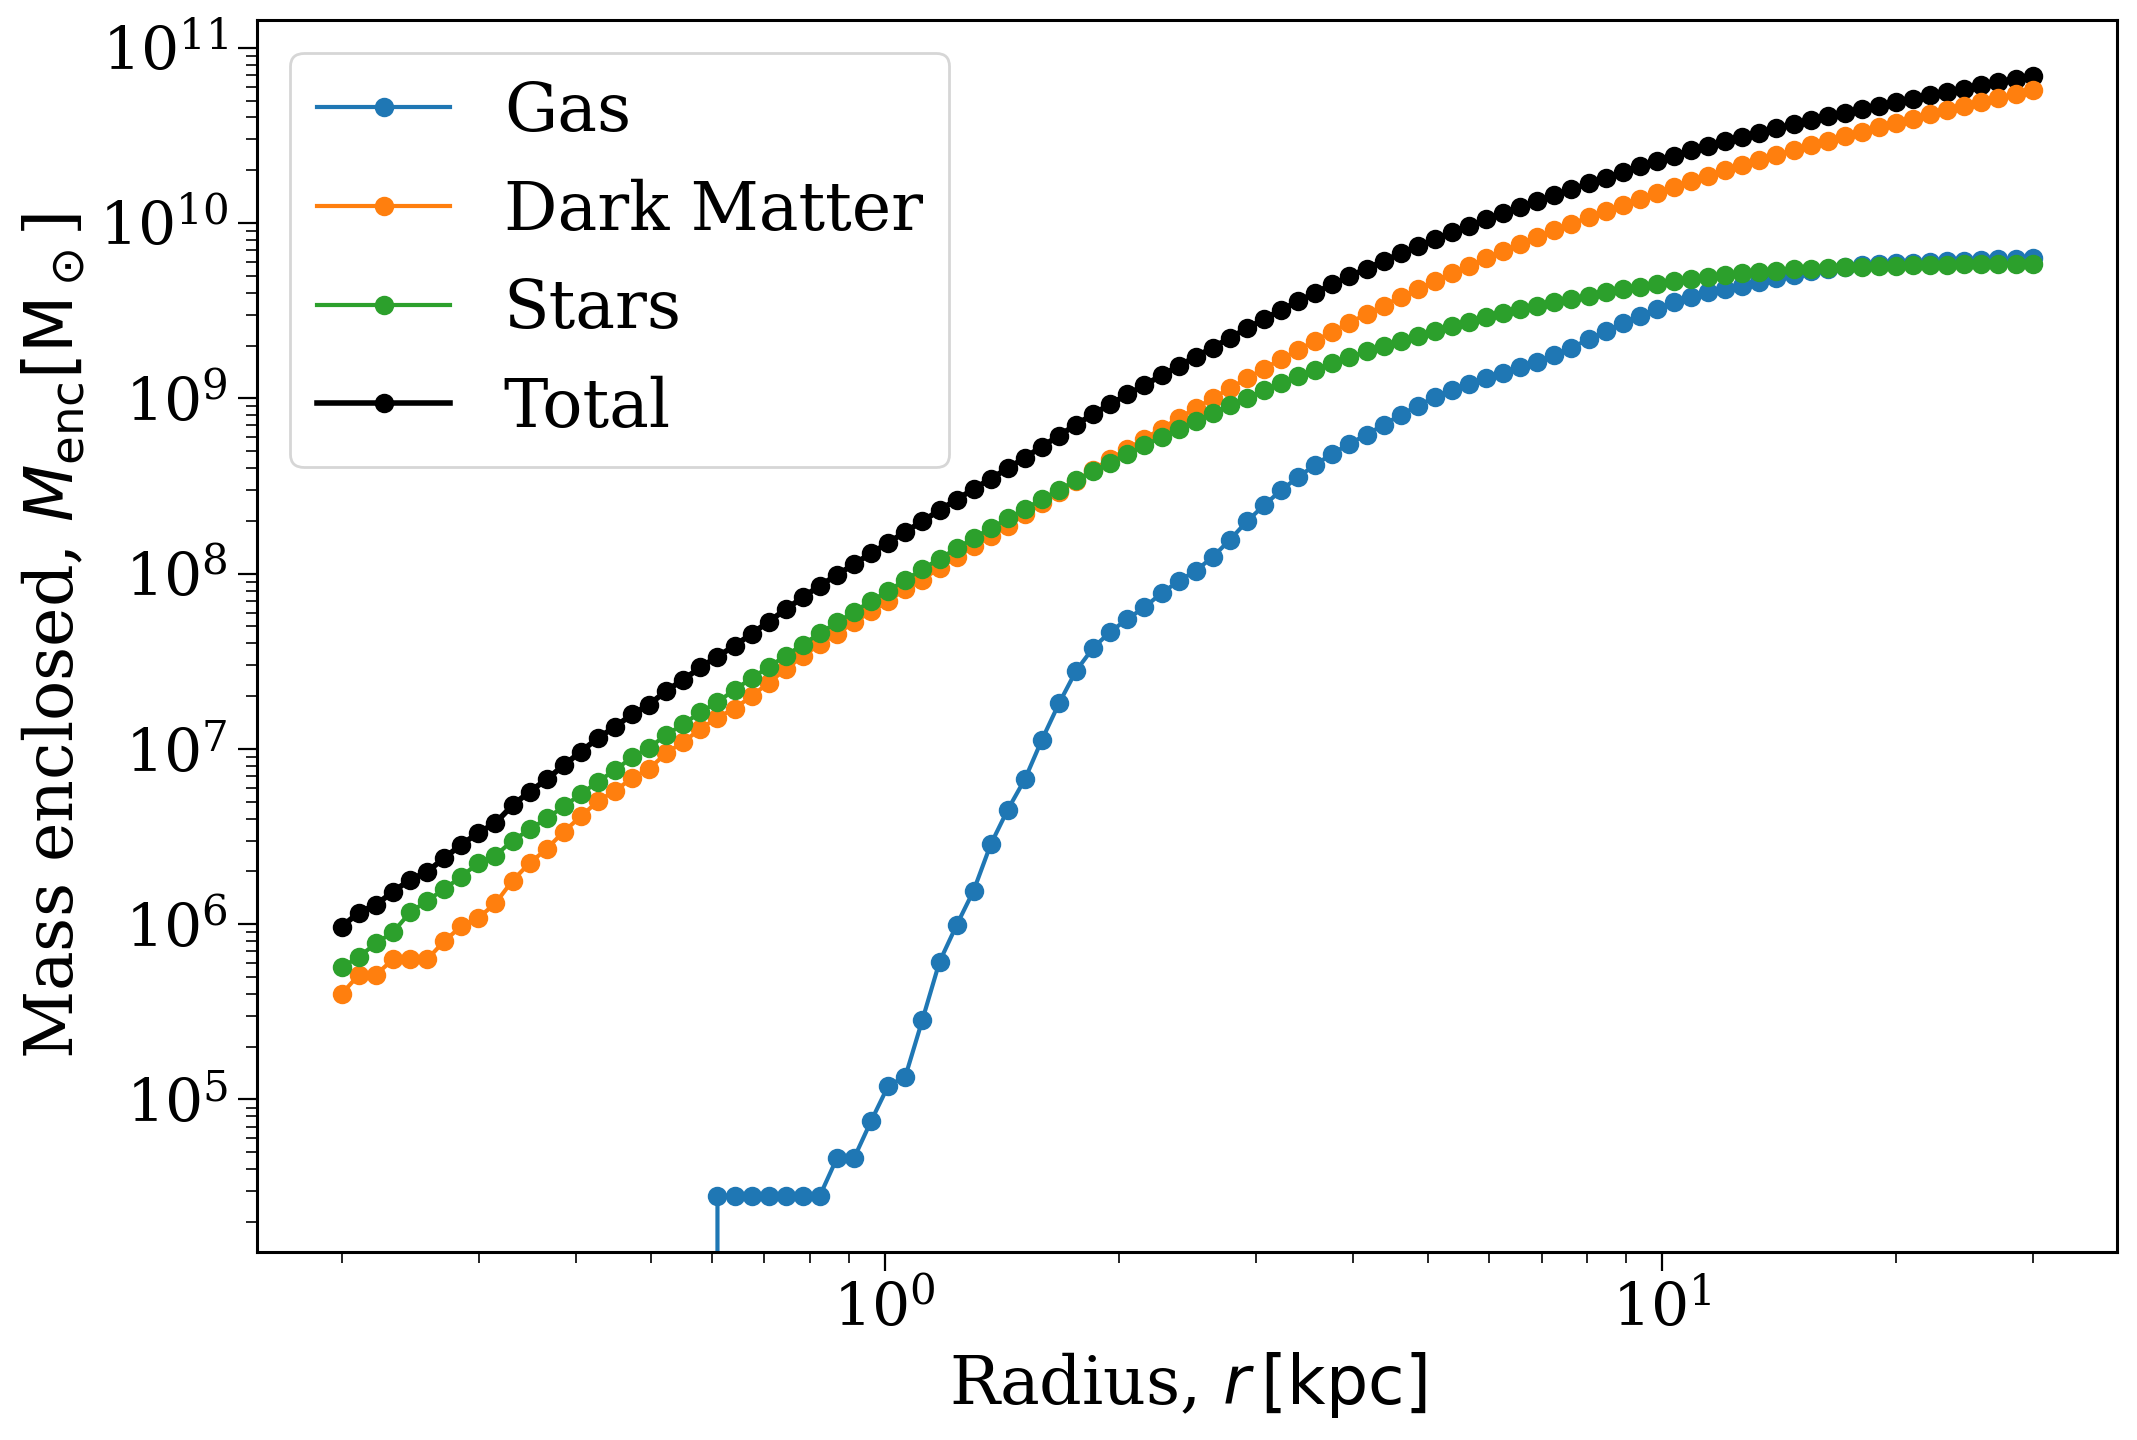

In [167]:
for label in ["Gas", "Dark Matter", "Stars"]: 
    plt.plot(r_range, m_enc[label], label=label, marker="o")
plt.plot(r_range, m_enc['total'], label="Total", color="black", lw=2, zorder=-1, marker="o")

plt.xscale("log")
plt.yscale("log")

plt.legend()
plt.xlabel(r"Radius, $r \, [\rm kpc]$")
plt.ylabel(r"Mass enclosed, $M_{\rm enc} [\rm M_\odot$]")
plt.show()

In [197]:
from astropy.visualization import quantity_support
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x155512587550>

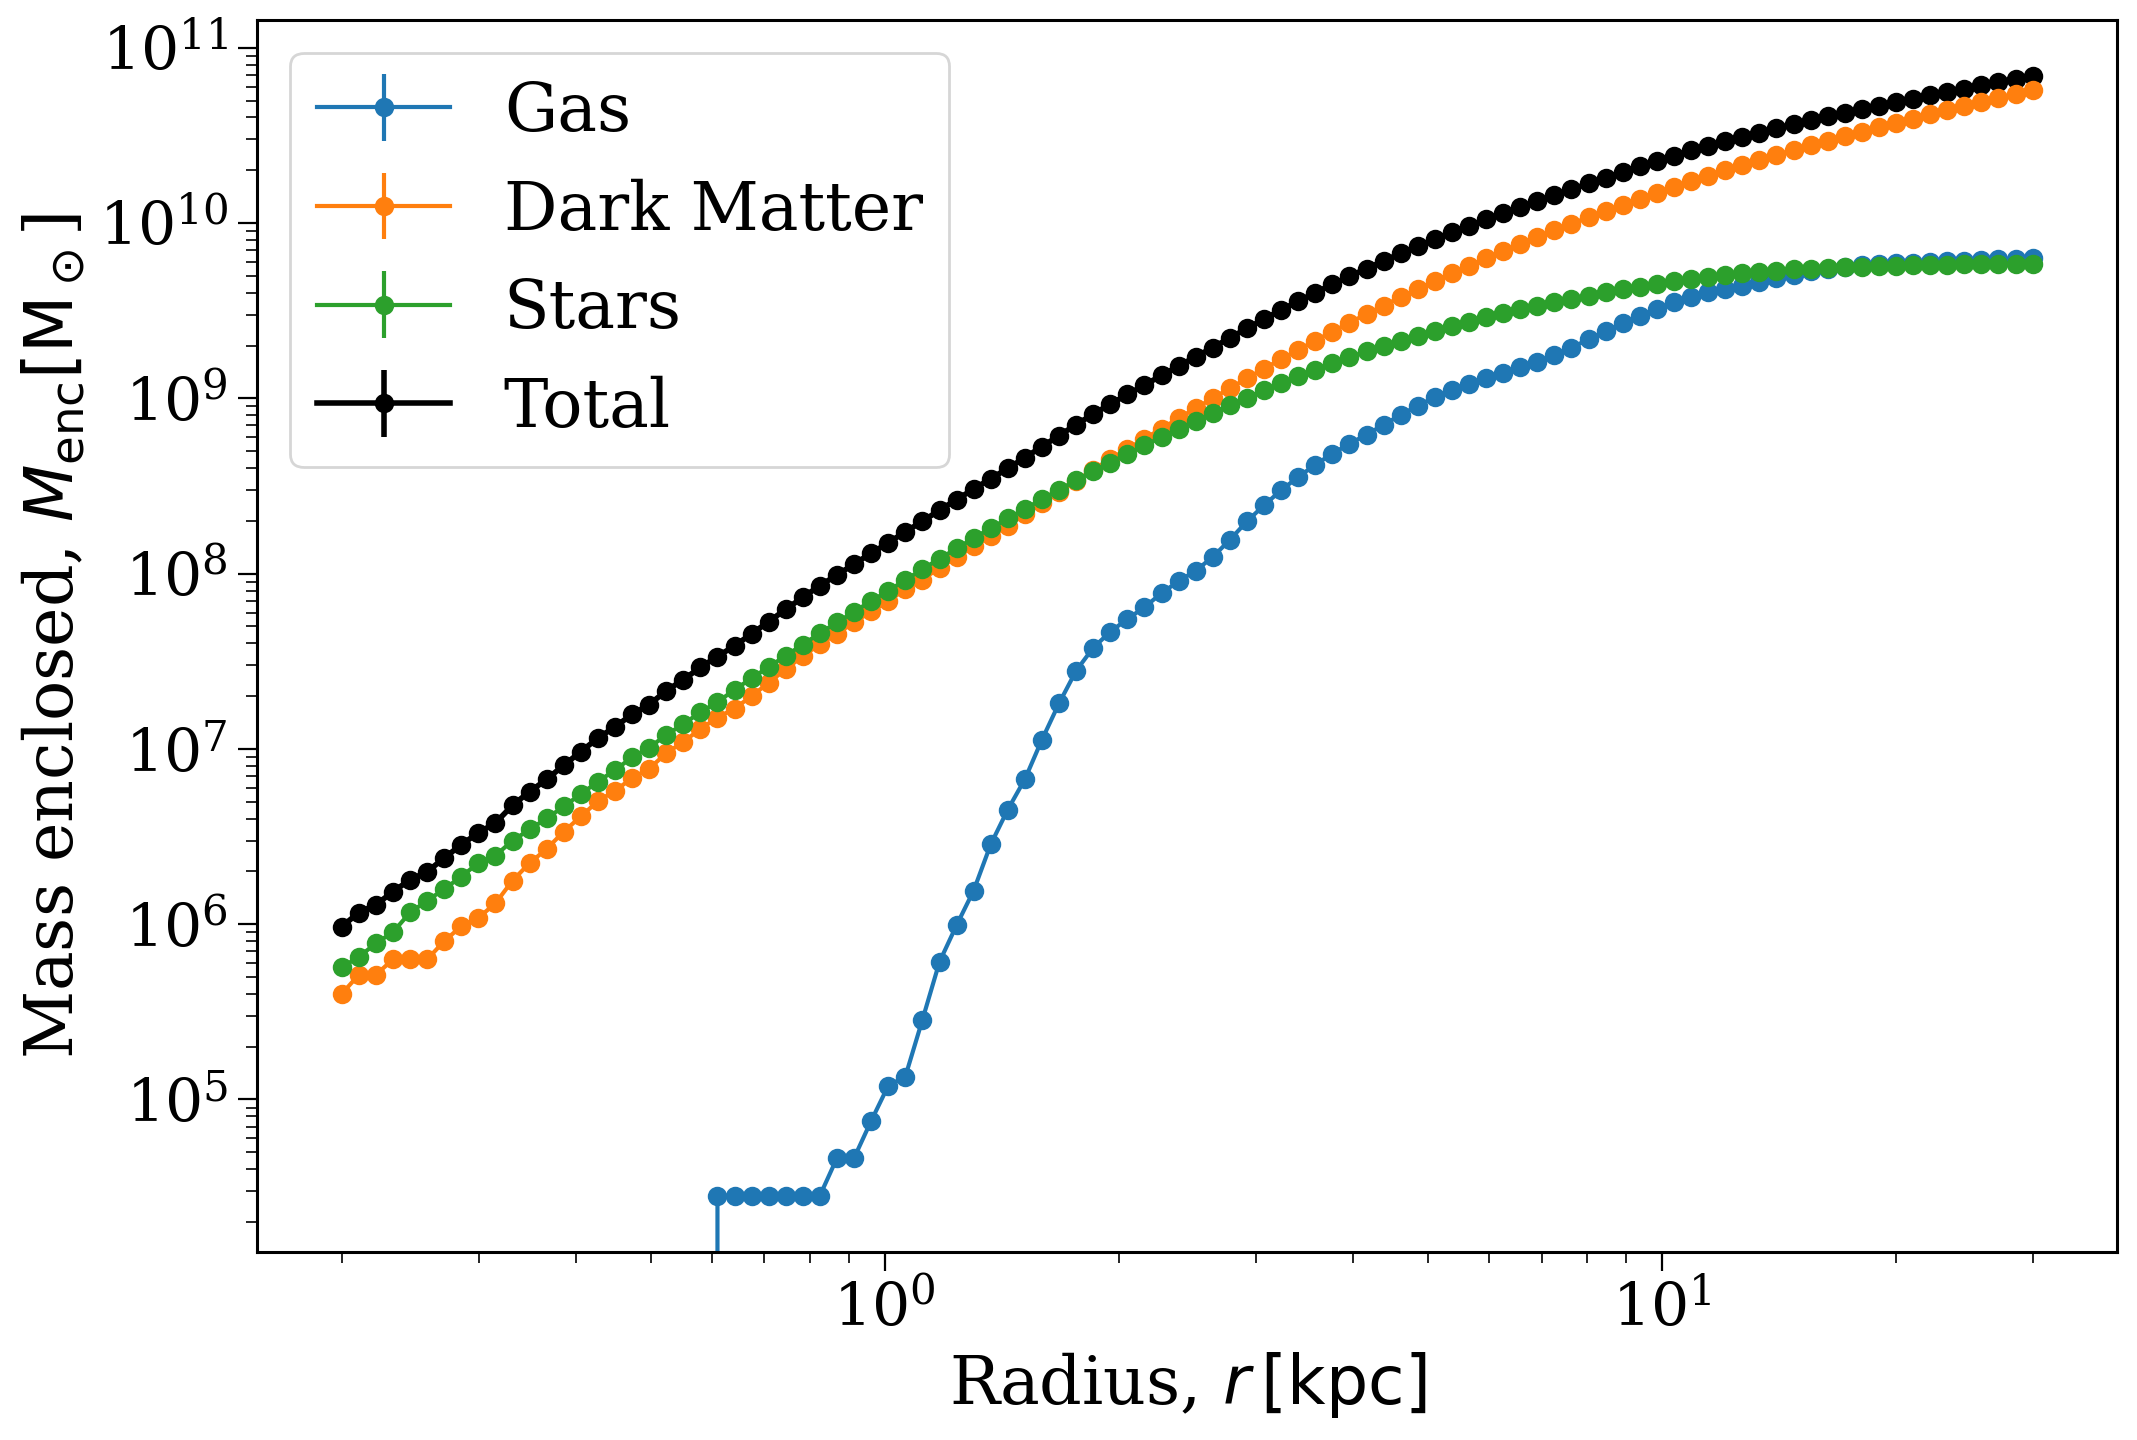

In [204]:
for label in ["Gas", "Dark Matter", "Stars"]: 
    plt.errorbar(r_range, m_enc[label].value, np.sqrt(m_enc[label].value), label=label, marker="o")
plt.errorbar(r_range, m_enc['total'].value, np.sqrt(m_enc['total'].value), label="Total", color="black", lw=2, zorder=-1, marker="o")

plt.xscale("log")
plt.yscale("log")

plt.legend()
plt.xlabel(r"Radius, $r \, [\rm kpc]$")
plt.ylabel(r"Mass enclosed, $M_{\rm enc} [\rm M_\odot$]")
plt.show()

npart_file:  [15054933 15799600  4341648        0   744667        0]
npart_total: [15054933 15799600  4341648        0   744667        0]
npart_file:  [15054933 15799600  4341648        0   744667        0]
npart_total: [15054933 15799600  4341648        0   744667        0]


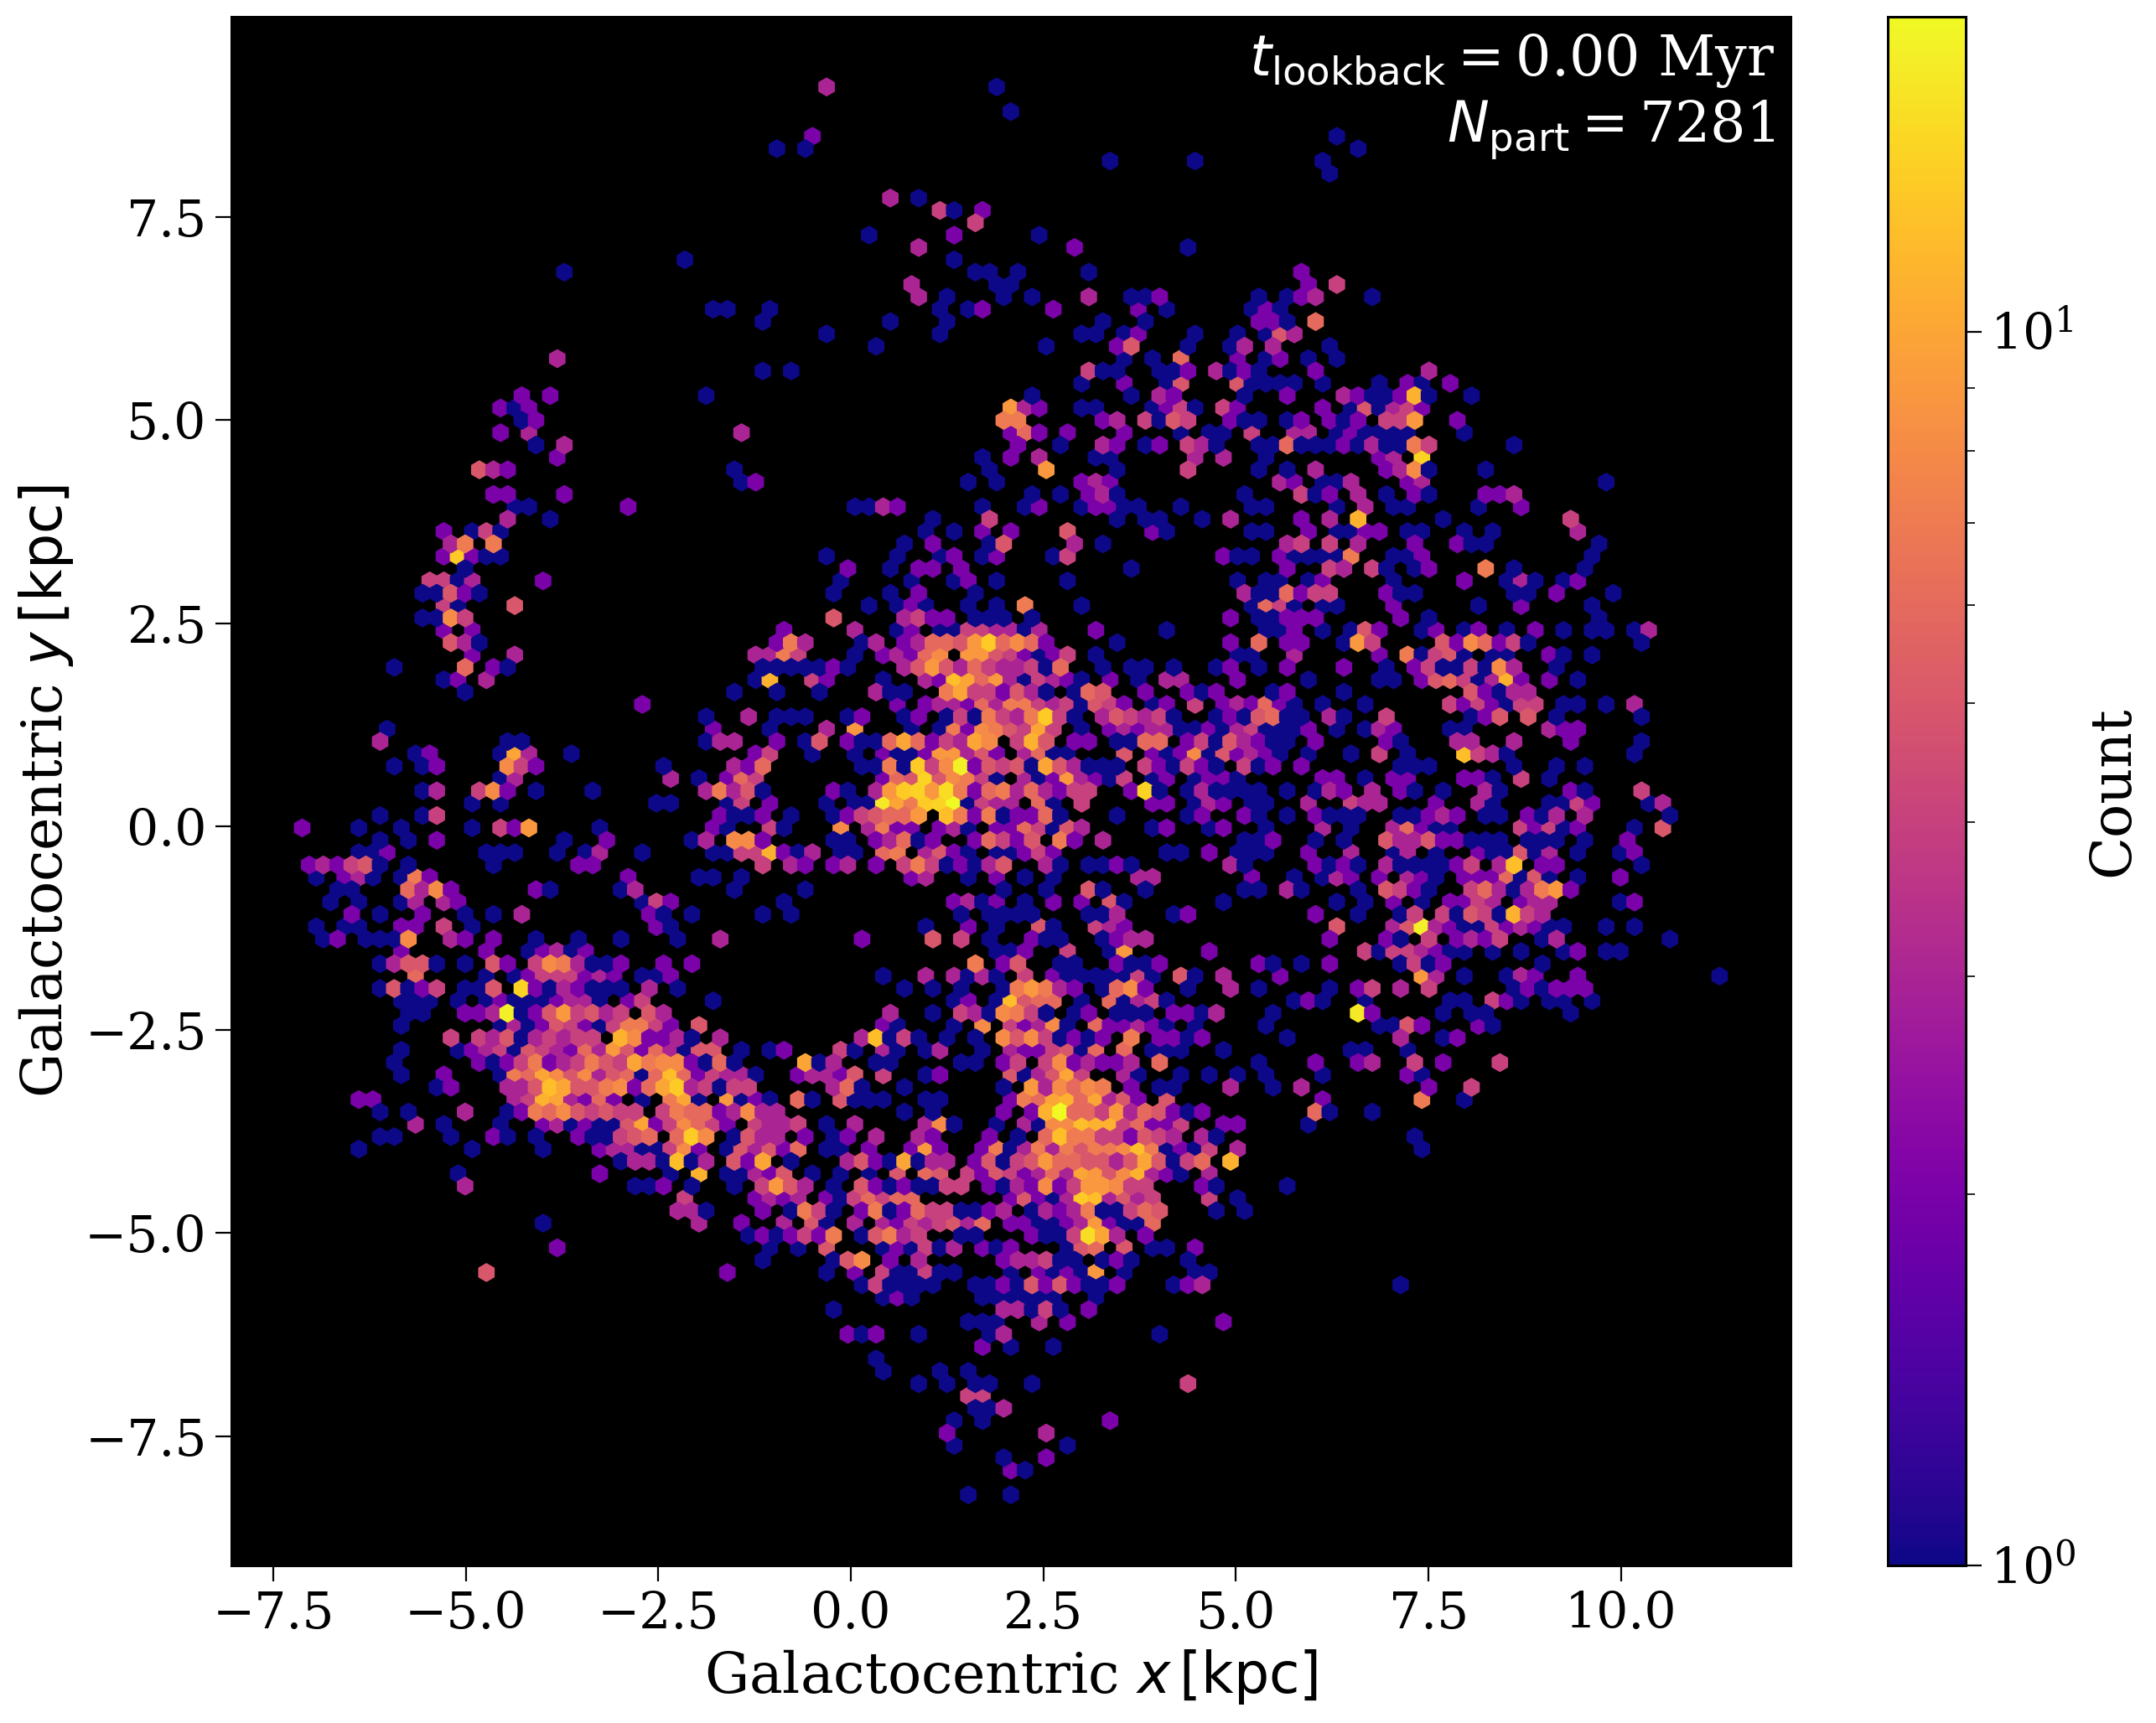

In [59]:
def plot_projection(snap_num=600, snap_dir="/mnt/home/chayward/firesims/fire2/public_release/core/m11h_res7100/output",
                    x_var="x", y_var="y", C_var=None, max_r=30, max_age=0.1,
                    cbar_label="Count", xlims=None, ylims=None, fig=None, ax=None, show=True, log=True,
                    scatter=False,
                    **hexbin_kwargs):
    # grab the snapshot data
    snap = readsnap.readsnap(sdir=snap_dir, snum=snap_num, ptype=4, cosmological=1)
    header = readsnap.readsnap(sdir=snap_dir, snum=snap_num, ptype=4, header_only=1, cosmological=1)

    # get info about the centre of the galaxy
    with h5.File(f"/mnt/home/twagg/ceph/FIREmaps/m11h_res7100/centers/snap_{snap_num}_cents.hdf5") as cent:
        n = cent.attrs["NormalVector"]
        centre = cent.attrs["Center"]
        v_cm = cent.attrs["StellarCMVel"]

    # get the positions, velocities and ages
    p_all = snap["p"] - centre
    v_all = snap["v"] - v_cm
    ages_all = get_stellar_ages(snap, header)

    # mask based on max distance to galaxy centre
    r_mask = np.linalg.norm(p_all, axis=1) < max_r

    # mask based on stellar age
    age_mask = quick_lookback_time(1 / snap["age"] - 1) > 13.676247060863073 - max_age

    total_mask = r_mask & age_mask
    p = p_all[total_mask]
    v = v_all[total_mask]
    ages = ages_all[total_mask]

    X_s = np.matmul(p, n.T).T
    V_s = np.matmul(v, n.T).T

    V_cyl = np.array([(X_s[0]*V_s[0]+X_s[1]*V_s[1])/(X_s[0]**2.+X_s[1]**2.)**0.5,
                      (X_s[0]*V_s[1]-X_s[1]*V_s[0])/(X_s[0]**2.+X_s[1]**2.)**0.5,\
                       V_s[2]])
    
    vars = {
        'x': X_s[0],
        'y': X_s[1],
        'z': X_s[2],
        'v_x': V_s[0],
        'v_y': V_s[1],
        'v_z': V_s[2],
        'v_r': V_cyl[0],
        'v_phi': V_cyl[1],
    }

    C = None
    if C_var == "age":
        C = ages
    elif C_var is not None:
        C = vars[C_var] if C_var in vars else snap[C_var][total_mask]

    if fig is None or ax is None:
        fig, ax = plt.subplots(figsize=(15, 12))
    elif len(ax.collections) > 0:
        ax.collections[0].remove()
        for child in ax.get_children():
            if isinstance(child, mpt.text.Annotation):
                child.remove()
    
    if "cmap" not in hexbin_kwargs:
        hexbin_kwargs["cmap"] = "plasma"
    if "gridsize" not in hexbin_kwargs:
        hexbin_kwargs["gridsize"] = 100
    if log:
        hexbin_kwargs["norm"] = mpt.colors.LogNorm()

    dens = ax.hexbin(vars[x_var], vars[y_var], C=C, **hexbin_kwargs)

    if len(fig.axes) == 1:
        fig.colorbar(dens, ax=ax, label=cbar_label)

    ax.set_facecolor("black")

    t_lookback = 13.676247060863073 - quick_lookback_time(1 / header["time"] - 1)
    n_part = len(p)
    label = r"$t_{\rm lookback} = $" + f'{t_lookback * 1000:1.2f} Myr\n' + r"$N_{\rm part} = $" + f'{n_part}' 
    ax.annotate(label, xy=(0.99, 0.99), xycoords="axes fraction",
                ha="right", va="top", color='white', fontsize=fs)
    
    ax.set_xlabel(r"Galactocentric $x \, [\rm kpc]$")
    ax.set_ylabel(r"Galactocentric $y \, [\rm kpc]$")

    ax.set_xlim(xlims)
    ax.set_ylim(ylims)

    if show:
        plt.show()
    return fig, ax


m11h_dir = "/mnt/home/chayward/firesims/fire2/public_release/core/m11h_res7100/"
snap_dir = os.path.join(m11h_dir, "output")

fig, ax = plot_projection(600, max_age=0.1, gridsize=100)

In [60]:
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

npart_file:  [15055909 15799600  4341648        0   743691        0]
npart_total: [15055909 15799600  4341648        0   743691        0]
npart_file:  [15055909 15799600  4341648        0   743691        0]
npart_total: [15055909 15799600  4341648        0   743691        0]
npart_file:  [15055909 15799600  4341648        0   743691        0]
npart_total: [15055909 15799600  4341648        0   743691        0]
npart_file:  [15055909 15799600  4341648        0   743691        0]
npart_total: [15055909 15799600  4341648        0   743691        0]
npart_file:  [15055772 15799600  4341648        0   743828        0]
npart_total: [15055772 15799600  4341648        0   743828        0]
npart_file:  [15055772 15799600  4341648        0   743828        0]
npart_total: [15055772 15799600  4341648        0   743828        0]
npart_file:  [15055659 15799600  4341648        0   743941        0]
npart_total: [15055659 15799600  4341648        0   743941        0]
npart_file:  [15055659 15799600  4

KeyboardInterrupt: 

npart_file:  [15055909 15799600  4341648        0   743691        0]
npart_total: [15055909 15799600  4341648        0   743691        0]
npart_file:  [15055909 15799600  4341648        0   743691        0]
npart_total: [15055909 15799600  4341648        0   743691        0]


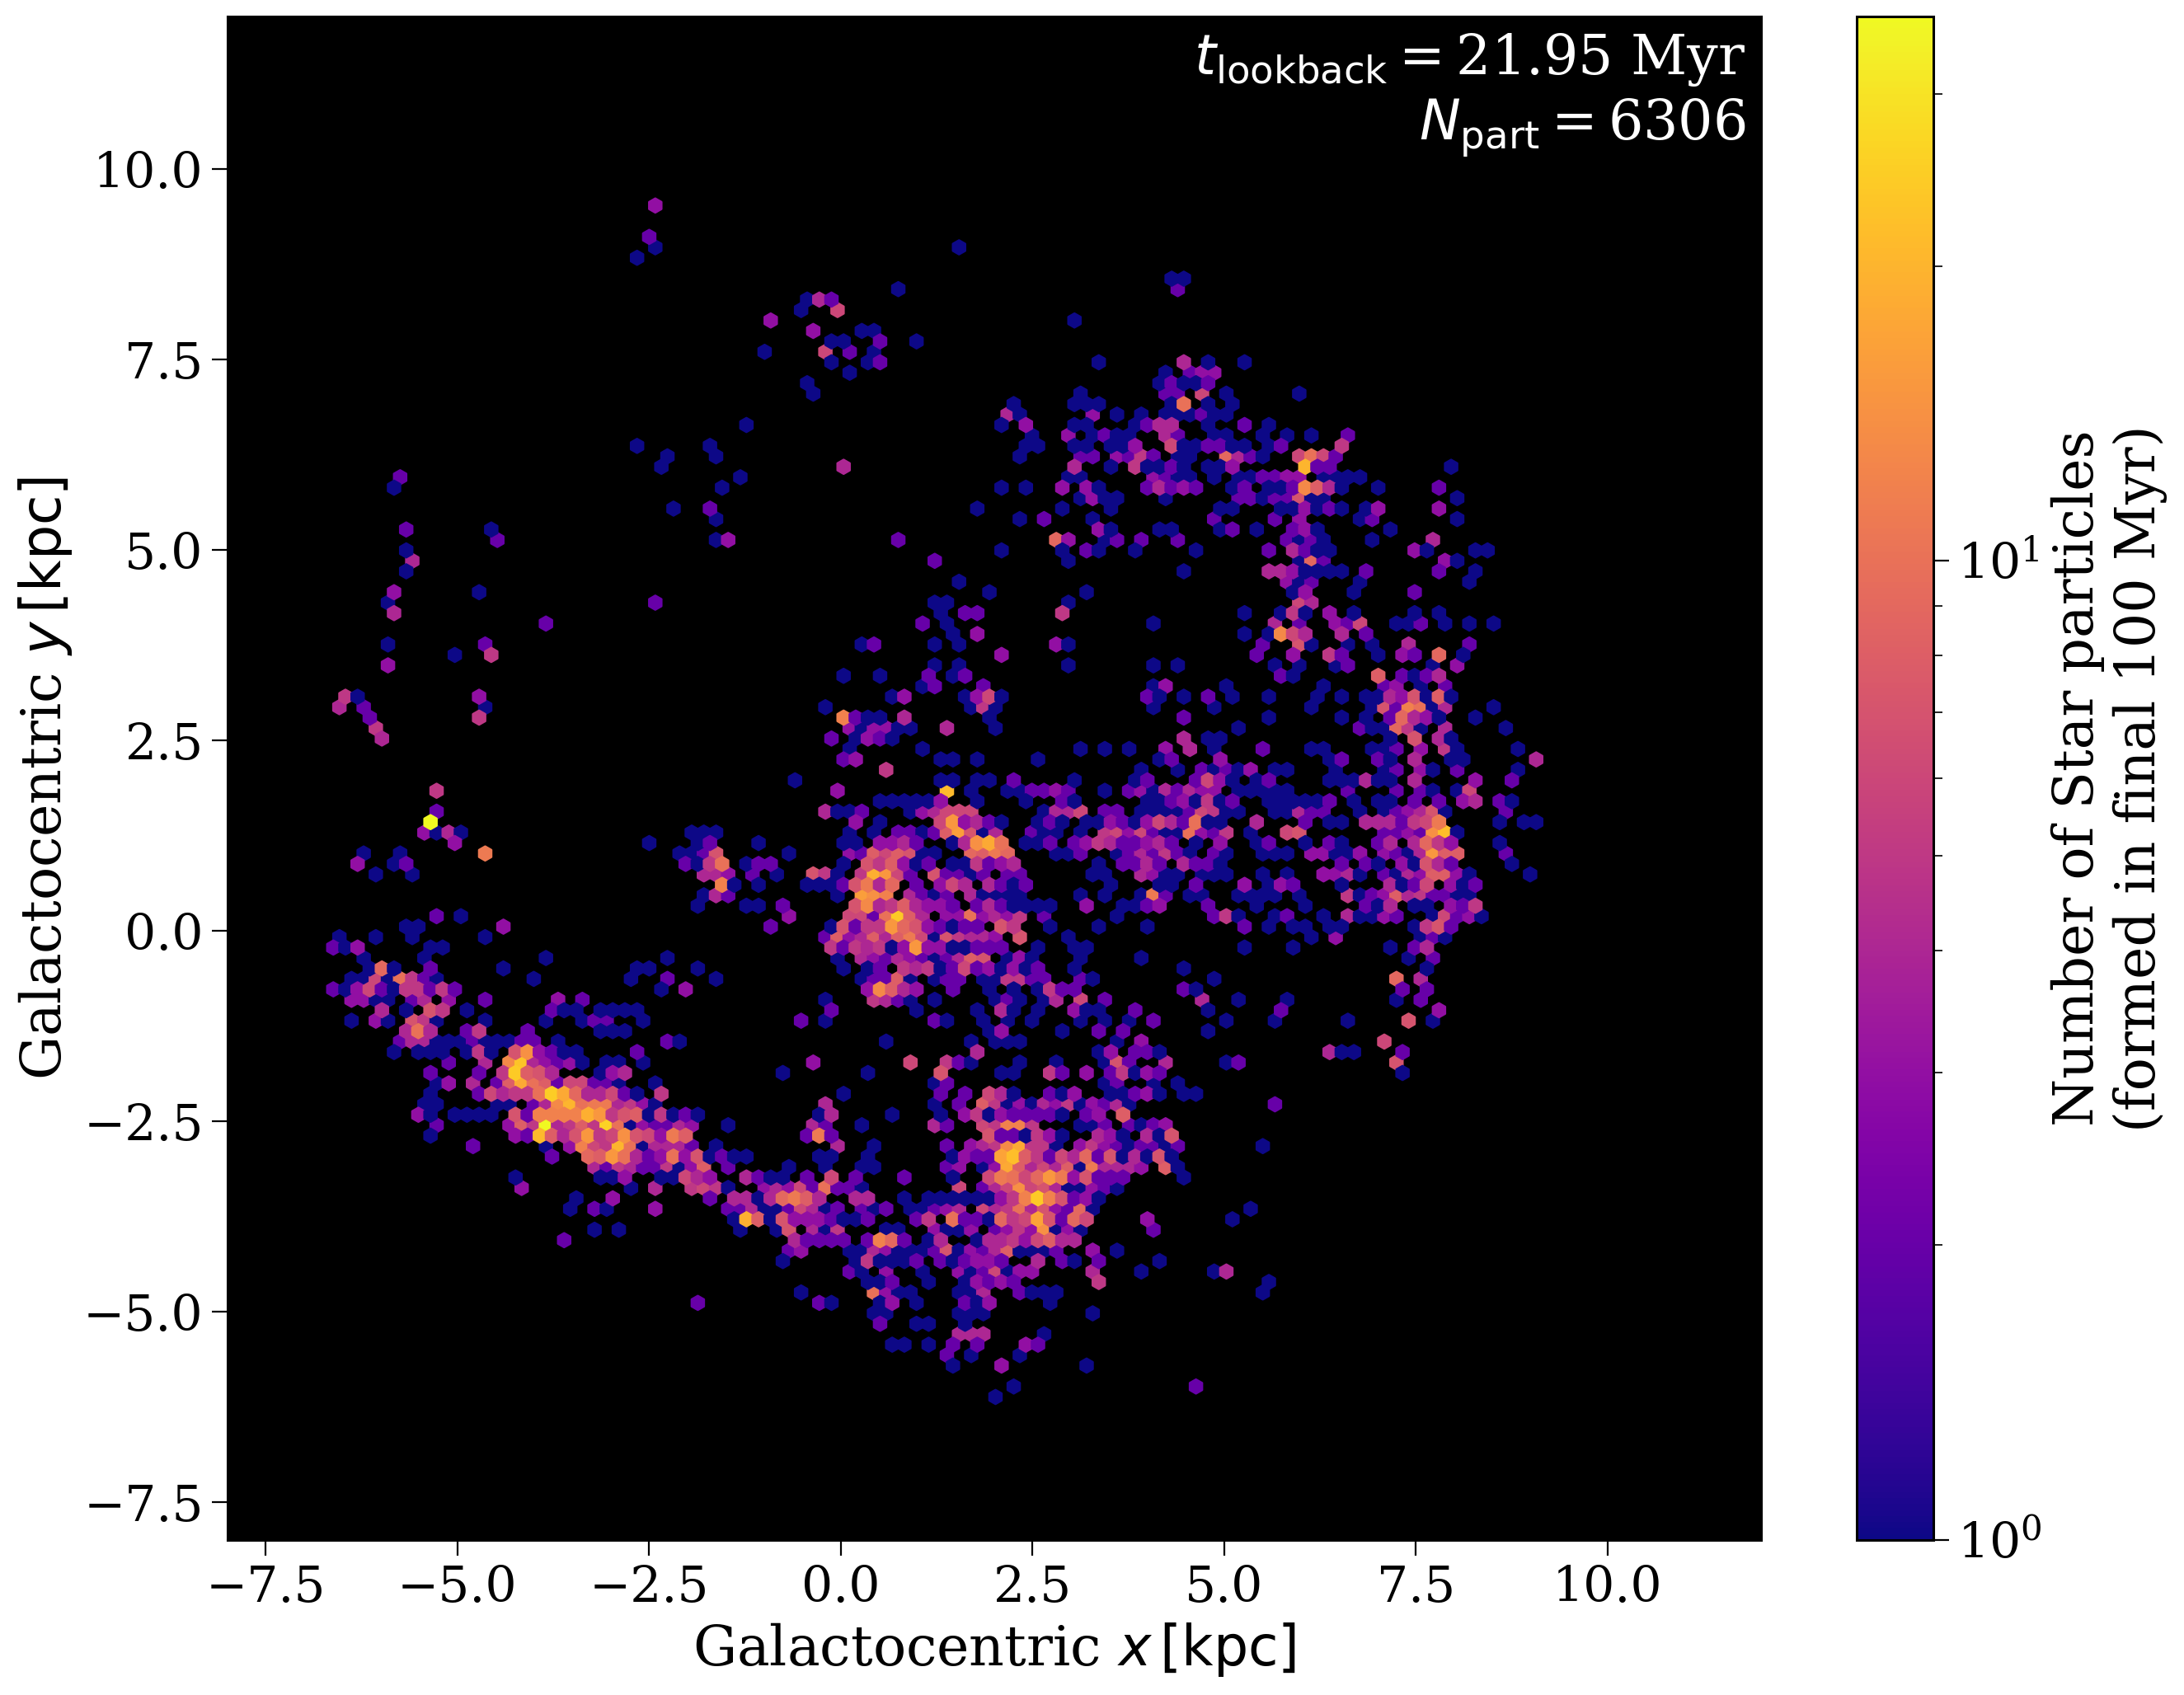

In [61]:
fig, ax = plt.subplots(figsize=(15, 12))
ani = FuncAnimation(fig, plot_projection,
                    list(range(590, 601)),
                    fargs=("/mnt/home/chayward/firesims/fire2/public_release/core/m11h_res7100/output",
                           'x', 'y', None, 30, 0.1, "Number of Star particles\n(formed in final 100 Myr)", (-8, 12), (-8, 12), fig, ax, False, True),
                    repeat=True, blit=False, repeat_delay=3000)

writer = animation.PillowWriter(fps=1,
                                metadata=dict(artist='Me'),
                                bitrate=1800)
ani.save('stars_within_100Myr.gif', writer=writer, dpi=300)

plt.show()

# Potential fitting